## Part 1 - Exploratory Data Analysis

#### Importing necessary packages for executing the code.

In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

#### loading the data.

In [4]:
df = pd.read_csv('kool_karma_data.csv', index_col='District')

In [5]:
df.head()

,ADVT,INCOME,SALES
District,,,
1,9.5,39.0,145.1
2,10.1,50.5,128.3
3,9.4,55.6,121.3
4,11.6,45.0,134.4
5,10.3,49.6,106.5


The features ADVT, INCOME, and SALES are shown in units of thousands of dollars. Note that the target variable here is SALES whereas the ADVT and INCOME variables are treated as predictors.

In [ ]:
# Look into the specifics of the dataframe.
df.info()

In [ ]:
## Summarize the features in the data set using descriptive statistics.
df.describe().T

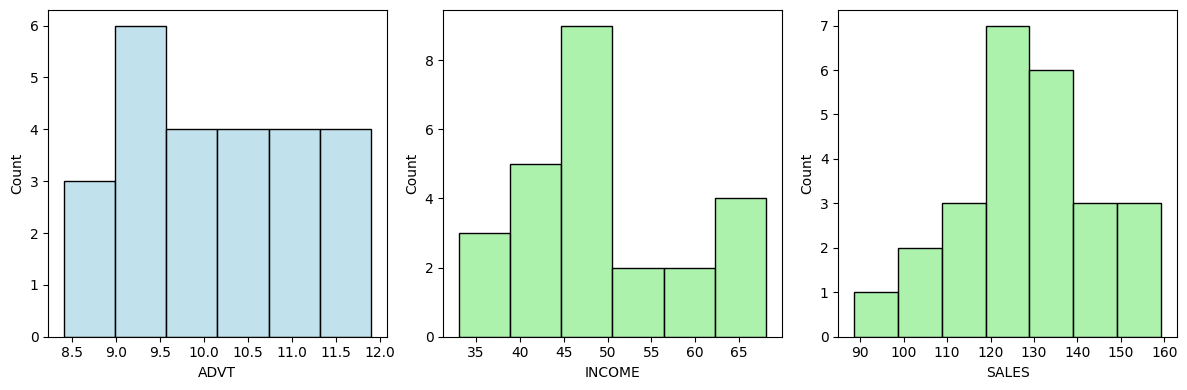

In [6]:
# Create histograms for the variables "ADVT", "INCOME" and "SALES".
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df, x="ADVT", color="lightblue")
plt.subplot(1, 3, 2)
sns.histplot(df, x="INCOME", color="lightgreen")
plt.subplot(1, 3, 3)
sns.histplot(df, x="SALES", color="lightgreen")

plt.tight_layout()

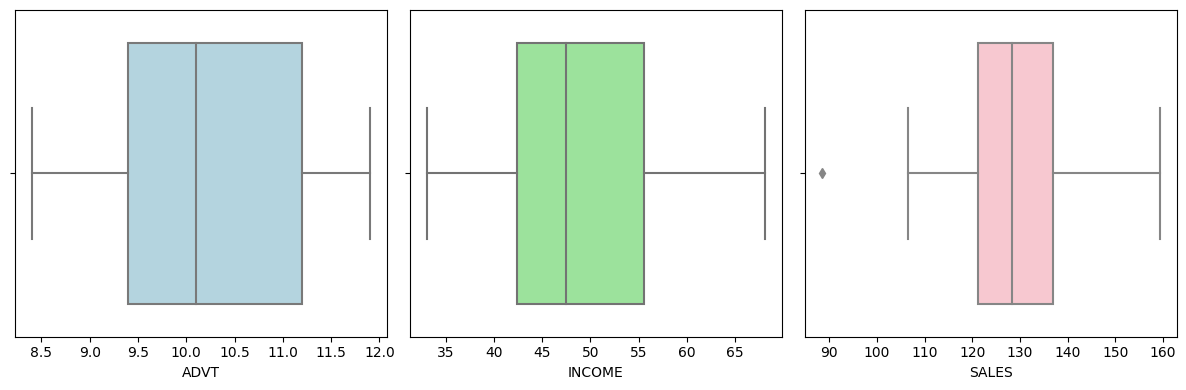

In [7]:
# Create boxplots for the variables "ADVT", "INCOME" and "SALES".
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(df, x="ADVT", color="lightblue")
plt.subplot(1, 3, 2)
sns.boxplot(df, x="INCOME", color="lightgreen")
plt.subplot(1, 3, 3)
sns.boxplot(df, x="SALES", color="pink")

plt.tight_layout()

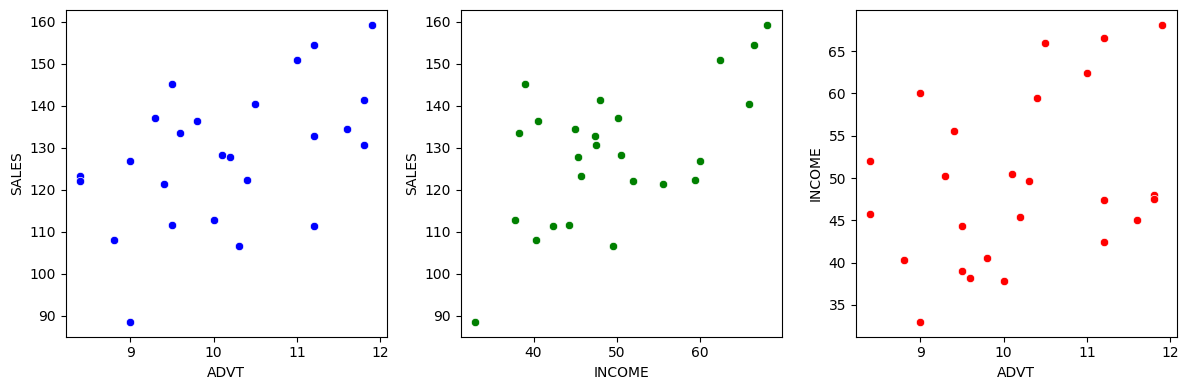

In [8]:
# Create scatter plots for the 'ADVT' versus 'SALES', 'INCOME' versus 'SALES', and 'INCOME' versus 'ADVT'.
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(df, x="ADVT", y="SALES", color="blue")
plt.subplot(1, 3, 2)
sns.scatterplot(df, x="INCOME", y="SALES",color="green")
plt.subplot(1, 3, 3)
sns.scatterplot(df, x="ADVT", y="INCOME",color="red")

plt.tight_layout()

(60.0, 180.0)

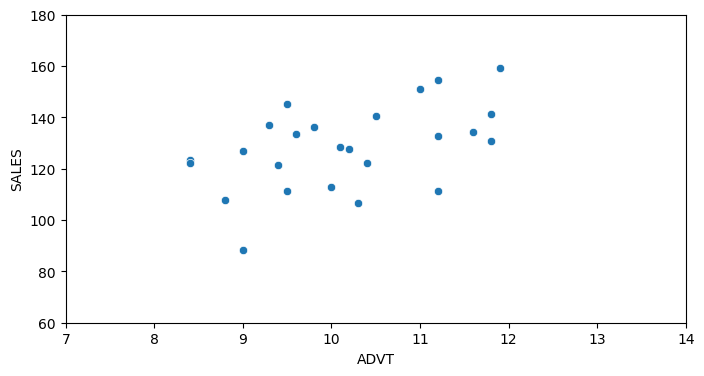

In [9]:
## Create a scatter plot of 'ADVT' vs 'SALES'.
plt.figure(figsize=(8,4))
sns.scatterplot(df, x='ADVT', y='SALES')
plt.xlim((7, 14))
plt.ylim((60, 180))

(60.0, 180.0)

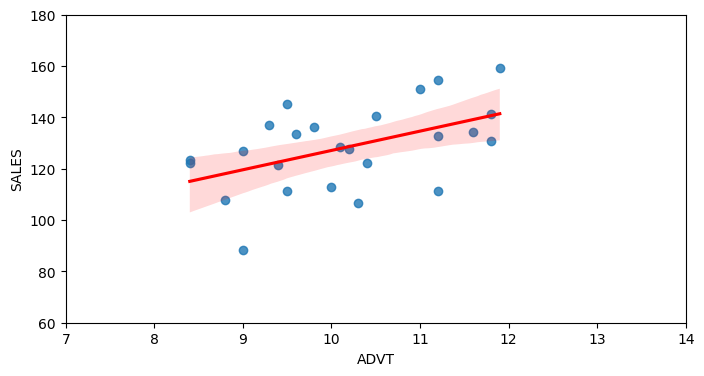

In [10]:
## Create a scatter plot of 'ADVT' vs 'SALES' and addming regression line using `regplot`.
plt.figure(figsize=(8,4))
sns.regplot(df, x='ADVT', y='SALES', line_kws= { 'color': 'red'})
plt.xlim((7, 14))
plt.ylim((60, 180))

C:\Users\Vr3n\codes\upgrad-maryland-analytics\upgrad_venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


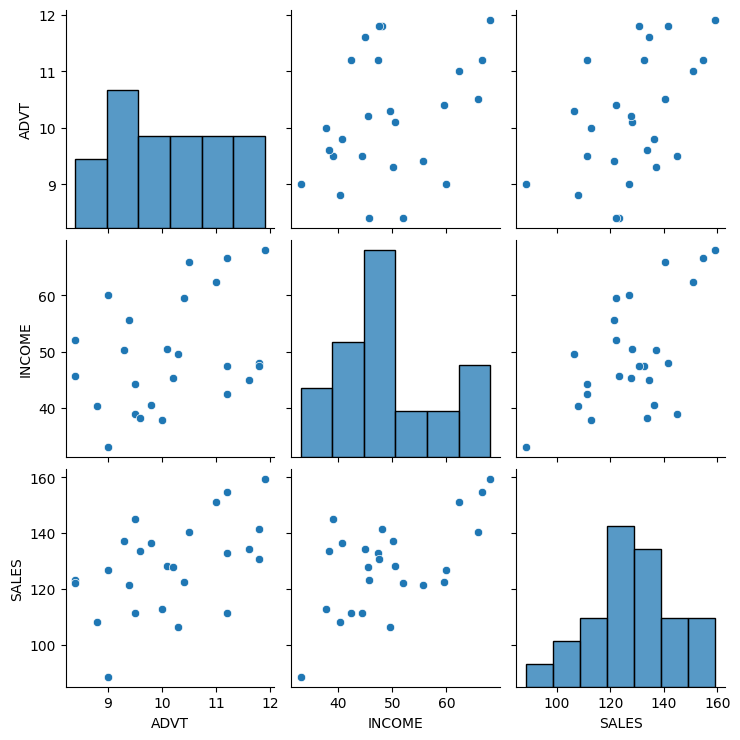

In [11]:
sns.pairplot(df)

In [25]:
corr_matrix_df = np.round(df.corr(), 2)

<Axes: >

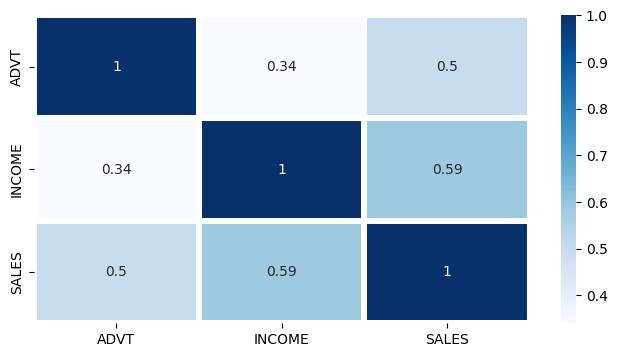

In [28]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr_matrix_df, annot=True, cmap="Blues", linewidth=3)

## Part 2 - Simple Linear Regression

in this section, we will:
- import necessary packages for executing the code.
- Train and evaluate sample linear regression models for the data.

### Model 1

In [49]:
lr_model_1 = smf.ols('SALES~ADVT', df)

In [50]:
lr_model_1_fit = lr_model_1.fit()

In [51]:
print(lr_model_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     7.540
Date:                Sun, 17 Dec 2023   Prob (F-statistic):             0.0115
Time:                        17:53:57   Log-Likelihood:                -101.30
No. Observations:                  25   AIC:                             206.6
Df Residuals:                      23   BIC:                             209.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8492     27.990      1.852      0.0